# In this project, we predict a simplified Air Quality Index (AQI) based on pollutant data
# and classify the air quality into categories like Good, Moderate, Unhealthy, etc.

Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Load and Inspect Data

In [16]:
# Load dataset with semicolon separator
path = '/content/AirQuality.csv'
df = pd.read_csv(path, sep=';')
# Drop useless columns
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Replace commas with dots and convert to float
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Drop rows with missing values
df = df.dropna()
print(df)
df.shape


            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

(9357, 15)

Feature Engineering: Build Simple AQI

In [17]:
# Create Simple AQI formula: 0.3*CO + 0.4*NO2 + 0.3*O3

# Rename columns for easier access
features = ['CO(GT)', 'NO2(GT)', 'PT08.S5(O3)']

# Simple AQI calculation
df['Simple_AQI'] = 0.3 * df['CO(GT)'] + 0.4 * df['NO2(GT)'] + 0.3 * df['PT08.S5(O3)']

Exploratory Data Analysis (EDA)

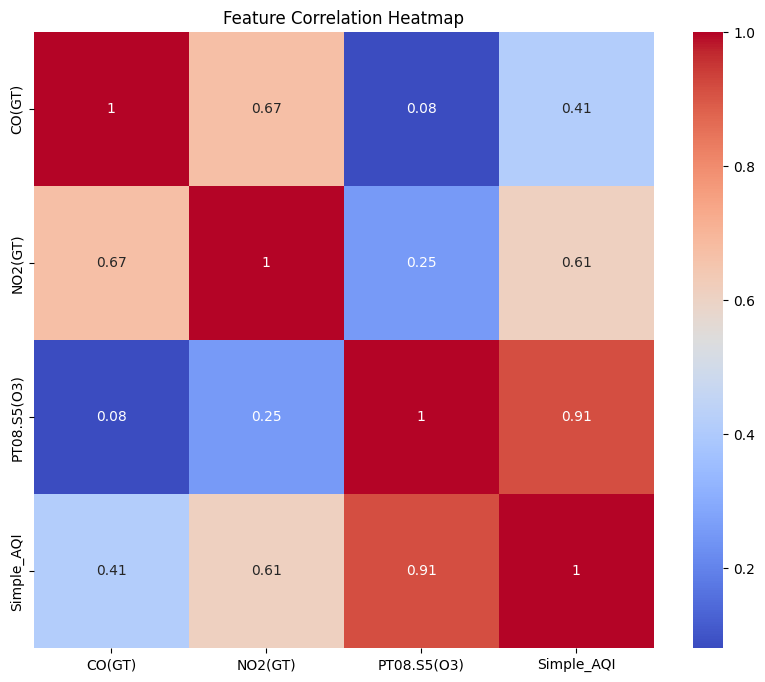

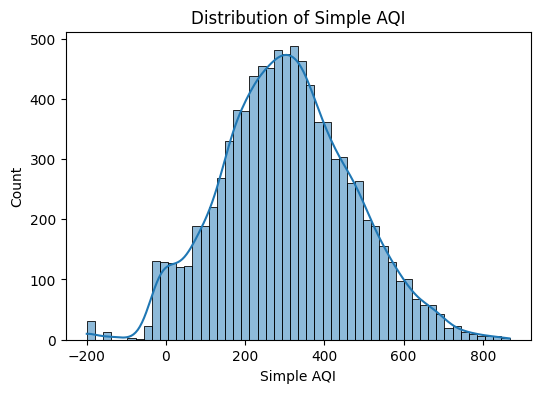

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['Simple_AQI']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Simple_AQI'], kde=True)
plt.title('Distribution of Simple AQI')
plt.xlabel('Simple AQI')
plt.show()

Regression: Predicting AQI

[242.19 189.6  484.88 ... 227.6  417.42 197.2 ]
Regression Evaluation:
MAE: 6.330928184353949e-14
RMSE: 7.491258771484392e-14
R2 Score: 1.0


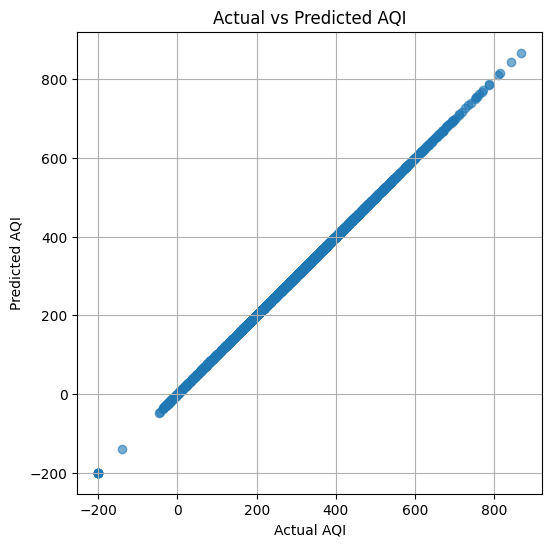

In [23]:
# Features and Target
X = df[features]
y = df['Simple_AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)
print(y_pred)

# Evaluation
print("Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Scatter plot of True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.grid()
plt.show()

Classification: Categorizing Air Quality


Classification Evaluation:
Accuracy: 0.9919871794871795
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00       117
                     Hazardous       1.00      1.00      1.00       952
                      Moderate       1.00      0.98      0.99        86
                     Unhealthy       0.97      0.97      0.97       176
Unhealthy for Sensitive Groups       0.96      0.98      0.97        98
                Very Unhealthy       0.99      0.99      0.99       443

                      accuracy                           0.99      1872
                     macro avg       0.99      0.99      0.99      1872
                  weighted avg       0.99      0.99      0.99      1872



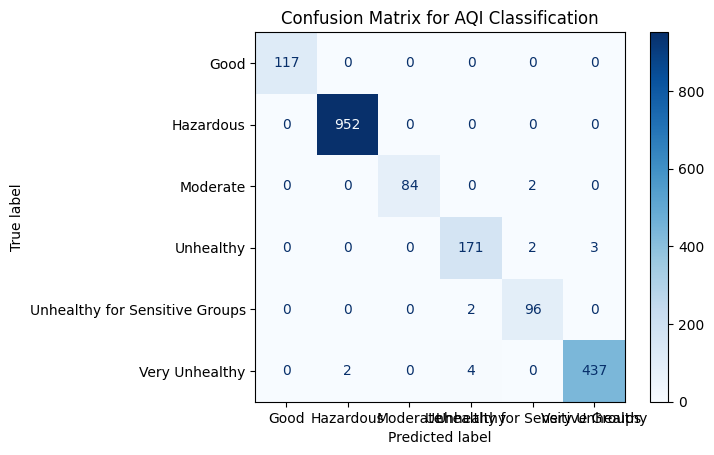

In [14]:
# Define function to categorize AQI
def categorize_aqi(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 200:
        return 'Unhealthy'
    elif value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Create a new column for categories
df['AQI_Category'] = df['Simple_AQI'].apply(categorize_aqi)

# Features and target for classification
X_class = df[features]
y_class = df['AQI_Category']

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_c, y_train_c)

# Predictions
y_pred_c = classifier.predict(X_test_c)

# Evaluation
print("\nClassification Evaluation:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix for AQI Classification')
plt.show()